In [95]:
import time
import os
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import math as m
import operator as op
from functools import reduce

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram

from quantuminspire.credentials import get_authentication
from quantuminspire.qiskit import QI

QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

In [20]:
authentication = get_authentication()
QI.set_authentication(authentication, QI_URL)

Enter email:
jmascaror98@gmail.com
Enter password
········


In [21]:
quantumResults, quantumCircuit = E91Circuit()
#qi_backend = QI.get_backend('QX-34-L')
qi_backend = QI.get_backend('Starmon-5')


In [22]:
def E91ProtocolQuantumRandom(messageLength,quantumCircuit,AliceBasis,BobBasis):
    """
    Given the initial message length (int) it returns
    messageInABottle: randomly generated message to be communicated (A->B)
    AliceBasis: randomly generated Alice Basis (0:Z, 1:X)
    BobBasis: randomly generated Bob Basis (0:Z, 1:X)
    OutputString: either the result from the BB84 protocol if A&B have the same basis
    or an "x" if Basis(A) != Basis(B)! for each bit
    """
    
    
    n = 0
#    messageInABottle = []
    messageAlice = []
    messageBob = []
#    AliceBasis = []
#    BobBasis = []
#    outputString = []
    sameBasisPositions = []
    

    job = execute(quantumCircuit, qi_backend,shots=messageLength,memory=True)
    result = job.result()
    counts = result.get_counts()
    measure = result.get_memory()
    n_register = len(measure[0])-1
    
    for n in range(messageLength):

        messageAlice.append(int(measure[n][n_register-1]))
        messageBob.append(int(measure[n][n_register-2]))
#        AliceBasis.append(int(measure[n][n_register-0]))
#        BobBasis.append(int(measure[n][n_register-3]))
        
        if AliceBasis[n] == BobBasis[n]:
#            outputString.append(int(measure[n][n_register-3]))
            sameBasisPositions.append(n)
#        else:
#            outputString.append("x")
    

    return messageAlice, messageBob,sameBasisPositions

#, AliceBasis, BobBasis,  outputString



In [58]:
prop = 0.5
tolerance = 0.8


def E91KeyConstruction(messageAlice,messageBob,goodIndices,prop,tolerance,explanation):
    
    """
    message: Alice starting message
    output: Bob's result through Quantum Magic
    goodIndices: bit Positions in which both basis are the same    
    prop: Proportion of common good bits to be compared
    tolerance: minimum success rate to generate a safe QK
    explanation: bool argument, if True, prints stuff

    """
    auxList = []    
    nGoodBits = len(goodIndices)
#    nBits = len(messageAlice)   
    
    nComparingBits = int(nGoodBits*prop)
#    print("good indices: ",goodIndices)
#    print("nComparintBits: ", nComparingBits)
#    nBits = int(nBits*prop)
    comparingBitPositions = rand.sample(goodIndices, nComparingBits)
    if explanation:
        print("Bit Positions to compare: ",comparingBitPositions)
    
    allOkCounter = 0
    for i in range(nComparingBits):
        j = comparingBitPositions[i]
        if int(messageAlice[j])== int(messageBob[j]):
            allOkCounter +=1
            
    for i in range(nGoodBits):
        if i not in comparingBitPositions:
            auxList.append(messageBob[goodIndices[i]])
    
    #print(allOkCounter)
    if nComparingBits == 0:
        successRate = 1 
    else:
        successRate = float(allOkCounter/nComparingBits)
    
    if successRate < tolerance:
        if explanation:
            print("Success rate: ",successRate)
            print("Failure")
        return 0
    else:
        if explanation:
            print("Success rate: ",successRate)
            print("Success!!!")
            print("QKD: ", auxList)
        return auxList

In [24]:
#the four cases
def E91Circuit_1(messageLength):
    
    """
    For Starmon5 purposes only 
    """
    
    q = QuantumRegister(5)
    ans = ClassicalRegister(5)
    qc = QuantumCircuit(q, ans)
    
    #Entanglement creation
    qc.h(q[1])
    qc.cnot(q[1],q[2])
    
#    qc.x(q[1])
    qc.barrier(q[1])
    qc.barrier(q[2])
    
    
    #Alice basis: 0 (Z)    

    AliceBasis = []
    for i in range(messageLength):
        AliceBasis.append(0)  
        
    #Bob basis: 0 (Z)
    BobBasis = []
    for i in range(messageLength):
        BobBasis.append(0)
    
    #Measurements of Alice q[1] and Bob q[2] performed
    qc.measure(q[1],ans[1])
    qc.measure(q[2],ans[2])
    
    


    
    return q,qc,AliceBasis,BobBasis


def E91Circuit_2(messageLength):
    
    """
    For Starmon5 purposes only 
    """
    
    q = QuantumRegister(5)
    ans = ClassicalRegister(5)
    qc = QuantumCircuit(q, ans)
    
    
    #Entanglement creation
    qc.h(q[1])
    qc.cnot(q[1],q[2])
    
    qc.barrier(q[1])
    qc.barrier(q[2])
    
    #Alice basis: 1 (X)
    
    qc.h(q[1])

    AliceBasis = []
    for i in range(messageLength):
        AliceBasis.append(1)
    
    #Bob basis: 0 (Z)
    BobBasis = []
    for i in range(messageLength):
        BobBasis.append(0)

    
    
    #Measurements of Alice q[1] and Bob q[2] performed
    qc.measure(q[1],ans[1])
    qc.measure(q[2],ans[2])
    
    


    
    return q,qc,AliceBasis,BobBasis

def E91Circuit_3(messageLength):
    
    """
    For Starmon5 purposes only 
    """
    
    q = QuantumRegister(5)
    ans = ClassicalRegister(5)
    qc = QuantumCircuit(q, ans)
    
    
    #Entanglement creation
    qc.h(q[1])
    qc.cnot(q[1],q[2])
    
    qc.barrier(q[1])
    qc.barrier(q[2])
    
    #Alice basis: 0 (Z)    

    AliceBasis = []
    for i in range(messageLength):
        AliceBasis.append(0)
    
    #Bob basis: 1 (X)
    qc.h(q[2])
    BobBasis = []
    for i in range(messageLength):
        BobBasis.append(1)
    


    
    #Measurements of Alice q[1] and Bob q[2] performed
    qc.measure(q[1],ans[1])
    qc.measure(q[2],ans[2])
    
    


    
    return q,qc,AliceBasis,BobBasis

def E91Circuit_4(messageLength):
    
    """
    For Starmon5 purposes only 
    """
    
    q = QuantumRegister(5)
    ans = ClassicalRegister(5)
    qc = QuantumCircuit(q, ans)
    
    
    #Entanglement creation
    qc.h(q[1])
    qc.cnot(q[1],q[2])
    
    qc.barrier(q[1])
    qc.barrier(q[2])
    
    #Alice basis: 1 (X)
    
    qc.h(q[1])
    AliceBasis = []
    for i in range(messageLength):
        AliceBasis.append(1)
    
    #Bob basis: 1 (X)
    qc.h(q[2])
    BobBasis = []
    for i in range(messageLength):
        BobBasis.append(1)


    
    #Measurements of Alice q[1] and Bob q[2] performed
    qc.measure(q[1],ans[1])
    qc.measure(q[2],ans[2])
    
    


    
    return q,qc,AliceBasis,BobBasis

In [12]:
qC_1.draw(output='mpl')

NameError: name 'qC_1' is not defined

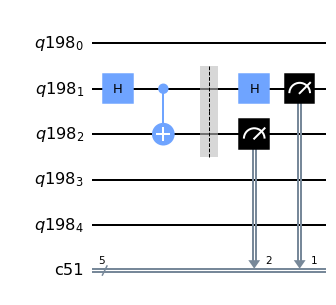

In [184]:
qC_2.draw(output='mpl')

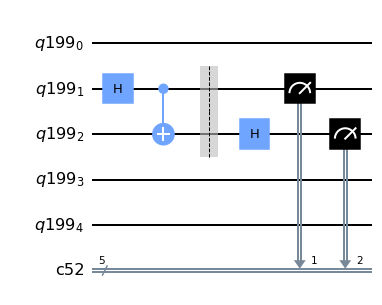

In [185]:
qC_3.draw(output='mpl')

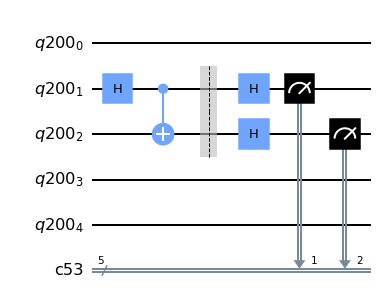

In [186]:
qC_4.draw(output='mpl')

In [55]:
messageLength=16384

qR_1,qC_1,AB_1,BB_1 = E91Circuit_1(messageLength)
qR_2,qC_2,AB_2,BB_2 = E91Circuit_2(messageLength)
qR_3,qC_3,AB_3,BB_3 = E91Circuit_3(messageLength)
qR_4,qC_4,AB_4,BB_4 = E91Circuit_4(messageLength)
mA_1, mB_1,gI_1 = E91ProtocolQuantumRandom(messageLength,qC_1,AB_1,BB_1)
mA_2, mB_2,gI_2 = E91ProtocolQuantumRandom(messageLength,qC_2,AB_2,BB_2)
mA_3, mB_3,gI_3 = E91ProtocolQuantumRandom(messageLength,qC_3,AB_3,BB_3)
mA_4, mB_4,gI_4 = E91ProtocolQuantumRandom(messageLength,qC_4,AB_4,BB_4)

#print("Alice Basis:      ", AB_4)
#print("Bob Basis:        ", BB_4)
#print("Alice Outputs:        ", messageAlice)
#print("Bob Outputs:          ", messageBob)
AB = AB_1 + AB_2 + AB_3 + AB_4
BB = BB_1 + BB_2 + BB_3 + BB_4
mA = mA_1 + mA_2 + mA_3 + mA_4
mB = mB_1 + mB_2 + mB_3 + mB_4 


#QKD = E91KeyConstruction(mA,mB,goodIndices,prop,tolerance,explanation=True)

In [59]:
gI_2_new = []
gI_3_new = []
gI_4_new = []

for i in range(len(gI_2)):
    gI_2_new.append(gI_2[i] + messageLength)
    
for i in range(len(gI_3)):
    gI_3_new.append(gI_3[i] + messageLength*2)
    
for i in range(len(gI_4)):
    gI_4_new.append(gI_4[i] + messageLength*3)
    

gI = gI_1 + gI_2_new + gI_3_new + gI_4_new
#print(len(gI))

QKD = E91KeyConstruction(mA,mB,gI,prop,tolerance,explanation=True)
    

Bit Positions to compare:  [52667, 54276, 10861, 14735, 59714, 3860, 5002, 8848, 6007, 4794, 5268, 4954, 15017, 12087, 59173, 54636, 6840, 61783, 51660, 63939, 4739, 63057, 14233, 13417, 4614, 2387, 65429, 2785, 1746, 51598, 65024, 7970, 13947, 3964, 59843, 62319, 54128, 59176, 7604, 58955, 15794, 8824, 12532, 11582, 57631, 52087, 50352, 56390, 8311, 55187, 57031, 15106, 11143, 54660, 15524, 49294, 3921, 64534, 62034, 63880, 63776, 63081, 12925, 5560, 64543, 61857, 10070, 50839, 12644, 7755, 63065, 11482, 61642, 5269, 340, 1475, 53167, 57090, 14112, 53461, 52603, 15403, 5986, 57196, 50589, 61367, 2089, 65535, 55165, 54168, 15532, 9485, 8684, 57935, 3163, 12607, 58705, 5046, 8625, 10567, 56216, 5852, 59417, 12648, 2160, 58437, 15989, 63603, 6672, 16069, 11001, 13442, 1488, 15715, 65120, 62719, 61728, 339, 60514, 14791, 15021, 6501, 58526, 1965, 11034, 56840, 4377, 427, 49566, 55926, 11011, 64710, 13487, 4359, 54508, 60615, 58178, 53841, 3000, 217, 61468, 8546, 13902, 14029, 2120, 1926, 

Success rate:  0.92071533203125
Success!!!
QKD:  [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [34]:
def TableShuffler(Table):
    #Input: Table, a 4xn_iter array
    #Output: Table Shuffled in columns (permutation)
    rng = np.random.default_rng()
    Shuffled = np.transpose(rng.permutation(np.transpose(Table)))
    return Shuffled

def TableFiltering(Table):
    #Input Table, a 4xn_iter array
    #Output: Table Filtered: Only those columns in which
    #Alice Basis = Bob Basis
    #i = 0: Alice Message
    #i = 1: Alice Basis
    #i = 2: Bob Basis
    #i = 3: Bob Measures
    SameBasisTable = np.zeros([4,1])
    for i in range(len(Table[0,:])):
        if Table[1,i] == Table[2,i]:
            newcol = np.zeros([4,1])
            for j in range(4):
                newcol[j,0]=Table[j,i]
            SameBasisTable = np.append(SameBasisTable,newcol,axis=1)
    SameBasisTable = np.delete(SameBasisTable,0,axis=1)
    return SameBasisTable

def TableGenerator(MesString,AliBasString,BobBasString,MeasString):
    #Intput: 4 arrays of 02 or 1s of same length
    #Output: Merge them into a table
    
    Table = np.zeros([4,len(MesString)])
    Table[0,:] = MesString
    Table[1,:] = AliBasString
    Table[2,:] = BobBasString
    Table[3,:] = MeasString
    
    return Table

def TableReorganisation(Table,n_rep):
    #Input: Filtered Table, number of iterations for repetition code
    #Output: Reorganised table by columns in groups of n_rep
    newTable = Table
    index_row = np.zeros(len(Table[0,:]),dtype = int)
    index_now = 0
    index_list = []
    for i in range(len(Table[0,:])):
        #print(i,"/",len(Table[0,:]))
        #print(index_row)
        if index_row[i] != 0:
            continue
        else:
            index_row[i] = index_now
            index_list.append(i)
            column_counter = 1
            leap = 1
            while column_counter < n_rep and i + leap < len(Table[0,:]): #We have not found all the columns or we have run out of columns
                if Table[0,i]==Table[0,i+leap] and Table[1,i]==Table[1,i+leap] and Table[1,i]==Table[1,i+leap]:
                    index_now += 1
                    column_counter += 1
                    index_row[i+leap] = index_now
                    index_list.append(i+leap)
                leap += 1
            index_now +=1
    
    #Table Reorganisation
    newTable[:] = Table[:,index_list]
    
    
    return newTable

def TableMayorityVoting(Table,n_rep):
    #Given the reorganised table, merges the columns applying mayority voting
    newTable = np.zeros([4,1])
    i = 0
    leap = 0
    while i + leap < len(Table[0,:]):
        newcol = np.zeros([4,1])
        for j in range(3):
            newcol[j,0]=Table[j,i]
        leap = 0
        cache = []
        while i + leap < len(Table[0,:]) and Table[0,i]==Table[0,i+leap] and Table[1,i]==Table[1,i+leap] and  leap <n_rep:
            cache.append(Table[3,i+leap])
            leap += 1
        
        #Mayority voting
        if len(cache) == n_rep:
            if cache.count(0) > cache.count(1):
                newcol[3,0] = 0
            else:
                newcol[3,0]= 1
        
            newTable = np.append(newTable,newcol,axis=1)
        i = i+leap
    
    newTable = np.delete(newTable,0,axis=1)
    
    return newTable

def NewStrings(Table):
    #Given the Mayority Voted Table, returns the new Alice Message and Bob Measures strings
    newAliceString = Table[0,:]
    newBobString = Table[3,:]
    
    return newAliceString,newBobString

def WholeRepetitionProcedure(AliceMess,AliceBas,BobBas,BobMeasure,n_rep):
    #Input: The 4 strings obtained through BB84 or E91 protocols, and how many repetition bits n_rep
    #Output: The new AliceKey and BobKey after the repetition protocol
    
    Table = TableGenerator(AliceMess,AliceBas,BobBas,BobMeasure)
    Shuffled = TableShuffler(Table)
    Filtered = TableFiltering(Shuffled)
    Reorganised = TableReorganisation(Filtered,n_rep)
    Mayority = TableMayorityVoting(Reorganised,n_rep)
    NewAliceKey, NewBobKey = NewStrings(Mayority)
    
    return NewAliceKey,NewBobKey

In [89]:
successrate=np.zeros(10)
n_reps=np.zeros(10)
failurerate=np.zeros(10)
for i in range(10):
    j =(2*i + 1)
    NewAliceKey, NewBobKey = WholeRepetitionProcedure(mA,AB,BB,mB,j)
    allOkCounter=0
    for k in range(len(NewAliceKey)):
        if int(NewAliceKey[k])== int(NewBobKey[k]):
            allOkCounter +=1
    successrate[i]= float(allOkCounter/len(NewAliceKey))
    failurerate[i]=1-successrate[i]
    n_reps[i]=j
#    print("n_reps: ", i, ". Success Rate: ", successrate)
print(n_reps,successrate)

[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.] [0.92309336 0.98150183 0.99481074 0.99914493 0.9991756  0.9996642
 1.         1.         1.         1.        ]


Text(0, 0.5, 'Final error rate')

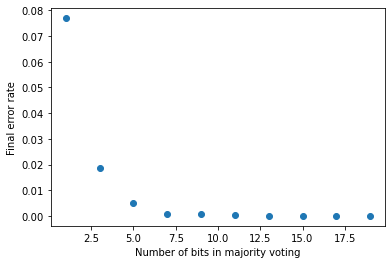

In [92]:
plt.plot(n_reps,failurerate,linestyle="",marker="o")
plt.xlabel("Number of bits in majority voting")
plt.ylabel("Final error rate")

In [96]:
def ProbOverallFailure(probSingleFailure,N):
    #using the repetition code and mayority voting for error correcting
    #with N repetitions devoted to a single logical bit transmission
    #with each one of the single iterations having a probability of failure
    
    #returns the overall probability of failure
    
    sum = 0
    for i in range(int(N/2)+1,N+1):
        sum += ncr(N,i)*m.pow(probSingleFailure,i)*m.pow(1-probSingleFailure,N-i)
    
    return sum

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

def NrepRequired(probSingleFailure,maxProbOverallFailure):
    #fixing the funciton attributes
    #returns the number of repetition bits required for:
    #probOverallFailure(probSingleFailure,NRepRequired) <= maxProbOverallFailure
    repBits = 1
    while(True):
        if maxProbOverallFailure >= ProbOverallFailure(probSingleFailure,repBits):
            break
        else:
            repBits += 2
    return repBits

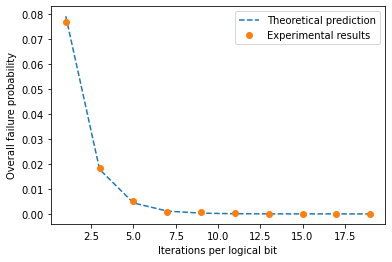

In [112]:
#Fixing ProbSingleFailure, plotting ProbOverallFailure(N repbits)

n = 9
N_repbits_max = 2*n +1
N_repbits_array = np.linspace(1,N_repbits_max,n+1,dtype=int)
N_probs = 2
#single_prob_array = np.linspace(0,0.25,N_probs)
overall_prob_array = np.zeros(n+1)
p=0.079284668


for j in range(n+1):
    overall_prob_array[j] = ProbOverallFailure(p,N_repbits_array[j])
plt.plot(N_repbits_array,overall_prob_array,"--",label= "Theoretical prediction") 
    #plt.set_xscale("log")
plt.plot(n_reps,failurerate,linestyle="",marker="o",label="Experimental results")



plt.xlabel("Iterations per logical bit")
plt.ylabel("Overall failure probability")
plt.legend()             
plt.show()